In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [6]:
#data aumentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.25
)
datagen.fit(x_train)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy

In [8]:
model=Sequential()
model.add(Conv2D(input_shape=(28,28,1),kernel_size=(5,5),filters=16,activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'training')
val_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'validation')

hist=model.fit(train_generator, batch_size=500, epochs=10, verbose=1,validation_data =val_generator)

Epoch 1/10
704/704 [==============================] - 14s 20ms/step - loss: 0.3969 - accuracy: 0.8770 - val_loss: 0.1410 - val_accuracy: 0.9567
Epoch 2/10
704/704 [==============================] - 14s 20ms/step - loss: 0.2575 - accuracy: 0.9220 - val_loss: 0.1139 - val_accuracy: 0.9645
Epoch 3/10
704/704 [==============================] - 14s 19ms/step - loss: 0.2147 - accuracy: 0.9342 - val_loss: 0.1079 - val_accuracy: 0.9681
Epoch 4/10
704/704 [==============================] - 14s 20ms/step - loss: 0.1936 - accuracy: 0.9415 - val_loss: 0.1000 - val_accuracy: 0.9696
Epoch 5/10
704/704 [==============================] - 14s 20ms/step - loss: 0.1789 - accuracy: 0.9460 - val_loss: 0.0857 - val_accuracy: 0.9731
Epoch 6/10
704/704 [==============================] - 14s 19ms/step - loss: 0.1642 - accuracy: 0.9502 - val_loss: 0.0761 - val_accuracy: 0.9758
Epoch 7/10
704/704 [==============================] - 14s 19ms/step - loss: 0.1606 - accuracy: 0.9521 - val_loss: 0.0778 - val_accuracy:

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test loss : {loss} / test accuracy : {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0424 - accuracy: 0.9854
test loss : 0.042397044599056244 / test accuracy : 0.9854000210762024


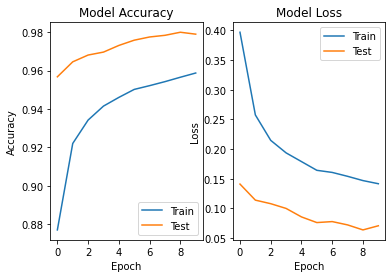

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='best')

plt.show()